# Data Wrangling 

In [83]:
# libraries 
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 

In [84]:
df = sns.load_dataset('titanic')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [86]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [87]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [88]:
df.isnull().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [89]:
# deck zaida hai to h is mei sy deck wala column remove kren gy 
# age ka mean lein gy 
# aur embarked aur embarked_town ka mode lein gy 
df.drop(columns='deck',inplace=True)
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])



In [90]:
# ab hum is mei phir is null check krty hai 
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# Outliers removal ab krna hai wo bhi visualization waly method sy 

<Axes: ylabel='age'>

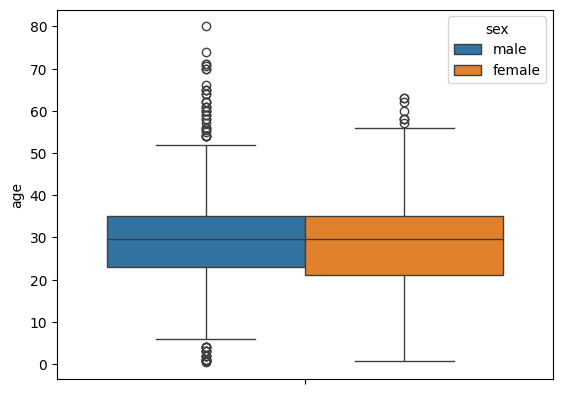

In [91]:
# ab hum iska box plot check krty hai 
sns.boxplot(data=df,y='age',hue='sex')
# ab is mei male mei outliers hai hm isko remove krty hai 
# IQR method sy aur Z-score method 


<Axes: xlabel='sex', ylabel='fare'>

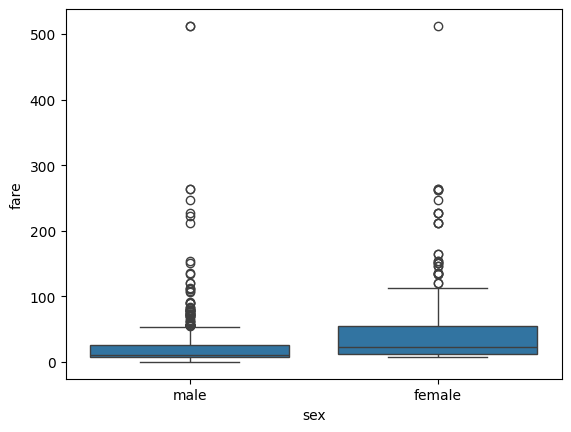

In [92]:
sns.boxplot(data=df,y='fare',x='sex')

In [93]:
# inter quartile range method 
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df = df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]
# ye formula hai is sy hm age ka outlier remove kren gy aur same way use for fare 

In [94]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = df['fare'] - 1.5*IQR
upper_bound = df['fare'] + 1.5*IQR
df = df[(df['fare']> lower_bound) & (df['fare']< upper_bound)]

<Axes: xlabel='age', ylabel='Count'>

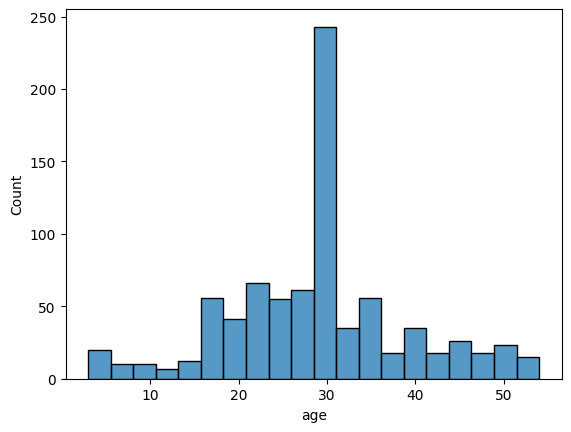

In [95]:
# ab hum isko hist plot sy check krty hai 
sns.histplot(df['age'])

<Axes: xlabel='fare', ylabel='Count'>

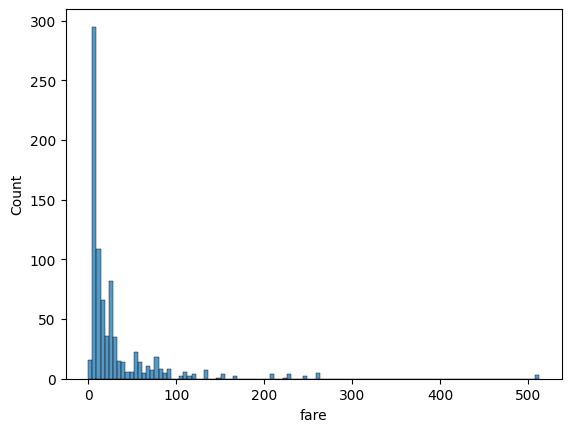

In [96]:
# yahan fare ka check krty hai 
sns.histplot(data=df,x='fare')

In [97]:
# ab hum iski shape check krty hai hmary pass kitna data rah gya hai 
df.shape

(825, 14)

In [98]:
# ab hum is mei sy duplicates remove krty hai 
# duplicates check krnh ky liye hm isko df1 kah dety hai 
df1 = df[df.duplicated()]

In [99]:
# ab hum check krty hai is mei kitny duplicates hai 
df.duplicated().sum()

np.int64(109)

In [100]:
# ab hum is mei sy remoc=ve krty hai duplicates 
df.drop_duplicates(inplace=True)

In [101]:
# ab hum phir iski shape check krty hai 
df.shape

(716, 14)

# Data Normalization 
data normalization is liye krty hai kah hm data ko aik hi scale mei la sken\
min-max normalization ky liye hm scikt learn library use krty hai 

In [102]:
# data normalization ky three steps hai main jo hmny seeikhny hai 
# 1. log transformation 
# 2. min-max normalization 



In [103]:
# Min-Max Normalization ky Liye ye formula use krty hai 
from sklearn.preprocessing import MinMaxScaler
# here put data 
df
# now select the columns to normalize 
cols_to_normalize = ['age','fare']
# creating a  scaller function 
scaler = MinMaxScaler()
# fit and transform data over scaler or vice versa
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize]) 

In [104]:
# same standard scaller sy hmremove krty hai 
from sklearn.preprocessing import StandardScaler
df
cols_to_normalize = ['age','fare']
scaller = StandardScaler()
df[cols_to_normalize] = scaller.fit_transform(df[cols_to_normalize])

<Axes: xlabel='sex', ylabel='fare'>

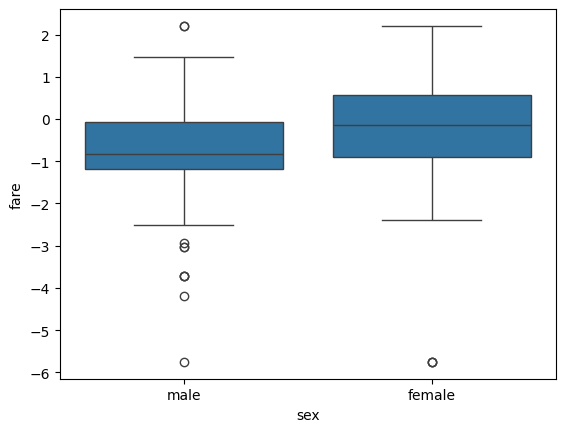

In [115]:
sns.boxplot(data=df,x='sex',y='fare')

In [105]:
# ab hm phir is ka check krty hai 
df.shape

(716, 14)

In [106]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.636531,1,0,-0.511396,S,Third,man,True,Southampton,no,False
1,1,1,female,0.846595,1,0,0.703347,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,-0.265749,0,0,-0.498591,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.568509,1,0,0.358401,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.568509,0,0,-0.496220,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.939290,0,5,-0.096417,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.914617,0,0,-0.079818,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.077142,1,2,-0.204074,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.265749,0,0,-0.079818,C,First,man,True,Cherbourg,yes,True


In [109]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            318
sibsp            0
parch            0
fare           542
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [ ]:
# log transformation ky liye hmko dataset import again krna pry ga 

In [107]:
# ab hm log transformation krty hai 
df['age'] = np.log(df['age'])
df['fare'] = np.log(df['fare'])



C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [108]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            318
sibsp            0
parch            0
fare           542
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

<Axes: xlabel='sex', ylabel='fare'>

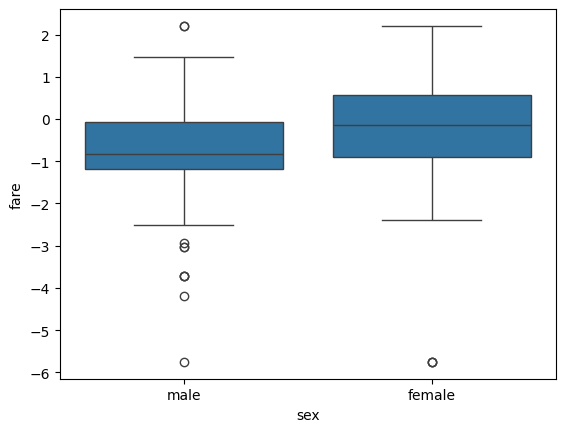

In [112]:
sns.boxplot(data=df,y='fare',x='sex')

<Axes: xlabel='age', ylabel='Count'>

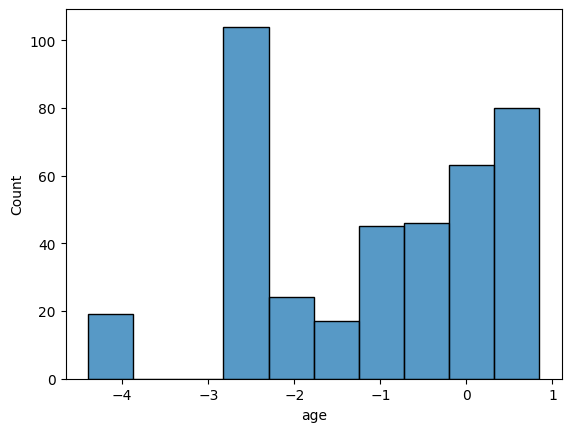

In [113]:
sns.histplot(data=df, x='age')
# hr method hr data ky lye theak nahi hota jaisy is mei ab log wala method age ky liye theak nahi hai 

In [114]:
df.columns 

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

# Organizing a data 

In [116]:
# we can add a new colmn  that make proper sense 
df['family_size'] = df['sibsp']+ df['parch']

<Axes: xlabel='family_size', ylabel='Count'>

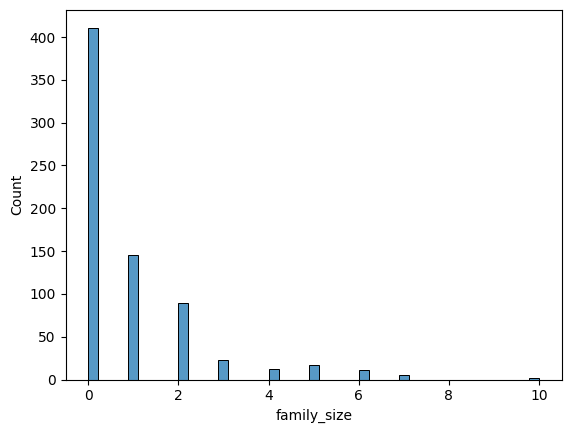

In [118]:
sns.histplot(data=df, x='family_size')

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


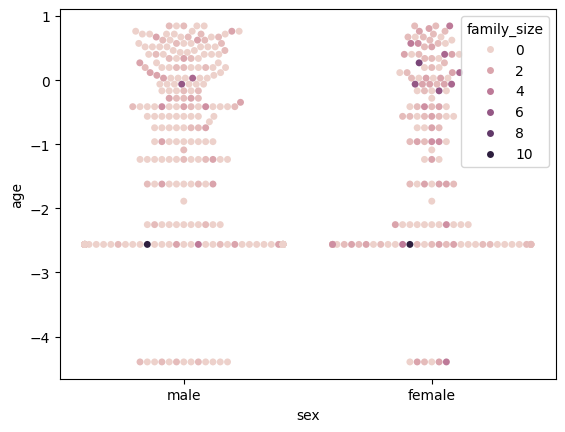

In [119]:
sns.swarmplot(data=df, x='sex',y='age',hue='family_size')

In [120]:
df = df.rename(columns={'survived':'survival'}) 
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [121]:
df.to_csv('wrangled.csv')